In [4]:
#The use of the chardet library to detect the encoding of a file/ to determine the most likely encoding
pip install chardet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import necessary libraries
import pandas as pd # For handling the dataset
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns  # For better visualizations
from sklearn.cluster import KMeans # For applying K-Means clustering

In [7]:
# Read the CSV file with 'latin1' encoding
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [8]:
# Display the first few rows of the dataset to understand its structure
print(df.head())  # Preview the data

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [9]:
# Check for missing values in each column
# It helps to know if there are any missing values that need to be handled
print(df.isnull().sum())

# Select the relevant features/columns for clustering
# Here, we're assuming 'SALES', 'QUANTITYORDERED', and 'PRICEEACH' are important
X = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]  # Example columns

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [10]:
sse = []  # List to store sum of squared errors for each k
k_range = range(1, 11)  # Define a range of k values (number of clusters) to test

# Loop through each k value to apply K-Means and calculate SSE
for k in k_range:
    # Fit K-Means model to the data for each k
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    # Append the inertia (SSE) to the list
    sse.append(kmeans.inertia_)

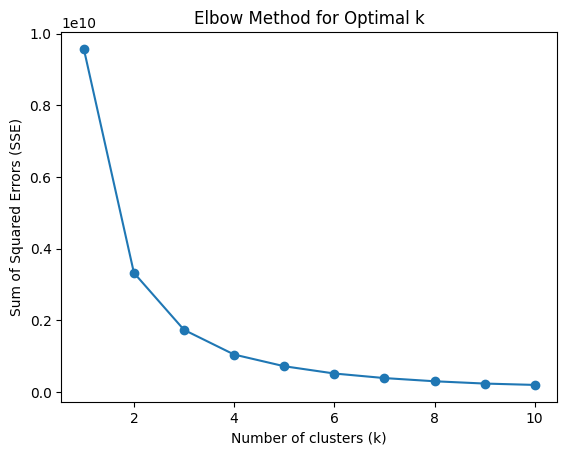

In [11]:
# Plot the elbow curve to find the optimal number of clusters (k)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)') # X-axis label
plt.ylabel('Sum of Squared Errors (SSE)') # Y-axis label
plt.title('Elbow Method for Optimal k') # Plot title
plt.show() # Display the plot

In [12]:
# From the elbow plot, we choose the optimal number of clusters (example: 3)
optimal_k = 3  # Example based on elbow method

# Fit the K-Means model again using the optimal number of clusters (k = 3)
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(X) # Assign each data point to a cluster

In [13]:
# Display the dataset with the new 'Cluster' column added
print(df.head())  # Check cluster assignments

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...          NaN   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          NaN   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          NaN   
3   8/25/2003 0:00  Shipped       3         8     2003  ...          NaN   
4  10/10/2003 0:00  Shipped       4        10     2003  ...          NaN   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0            NYC    NY      10022     U

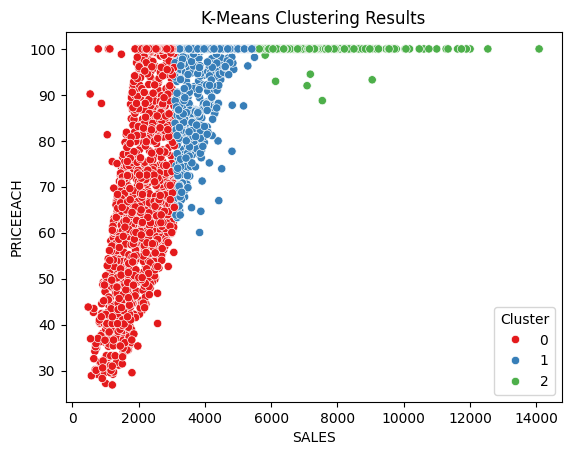

In [14]:
# Plot the clusters using a scatterplot
sns.scatterplot(x='SALES', y='PRICEEACH', hue='Cluster', data=df, palette='Set1')
plt.title('K-Means Clustering Results') # Title for the plot
plt.show() # Display the plot

In [15]:
print(f"Number of clusters: {kmeans.n_clusters}")

Number of clusters: 3
